# **Gradient Descent from Scratch :**

Most important optimization technique used with conjuction of BackPropagation to train diffrent models including ANN, CNN, RNN, Trannsformers, etc..

**🎯GOAL :** Use gradient descent to train linear regression model to predict `tmax_tomorrow` using `tmax, tmin, rain`.

## **Handling Data :**

In [60]:
# mount google drive
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [96]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 4)
import warnings
warnings.filterwarnings("ignore")

In [97]:
# fetch the data
data = pd.read_csv("/content/drive/MyDrive/NLP_from_scratch/data/clean_weather.csv",
                   index_col = 0)
data.ffill(inplace = True)
data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13509 entries, 1970-01-01 to 2022-11-26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tmax           13509 non-null  float64
 1   tmin           13509 non-null  float64
 2   rain           13509 non-null  float64
 3   tmax_tomorrow  13509 non-null  float64
dtypes: float64(4)
memory usage: 1.0+ MB


In [99]:
data.shape

(13509, 4)

## **Linear Regression :**

$$\hat{y} = wx + b$$

* $w$ is the weights.
* $x$ is the row vector of data.
* $b$ is the bias.
* **Goal:** To find the "best-fit" straight line (or hyperplane in higher dimensions) that describes the linear relationship between the input features and the output variable



**Exploring the data :**

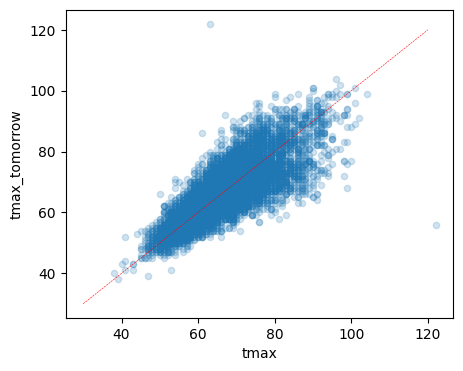

In [100]:
data.plot.scatter("tmax", "tmax_tomorrow", alpha = 0.2, figsize=(5, 4));
plt.plot([30, 120], [30, 120], c = "r", linestyle = "--", linewidth = 0.4);

In [101]:
correlation_matrix = data.corr()
correlation_matrix

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


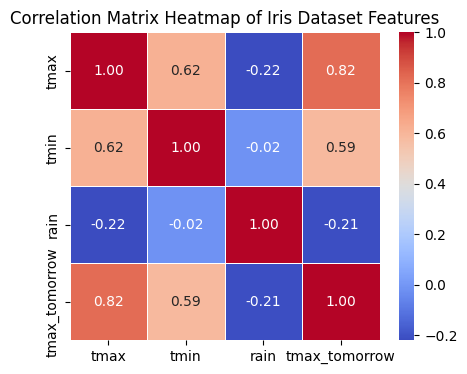

In [102]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Matrix Heatmap of Iris Dataset Features')
plt.show();

We can see that we have almost a linear relationship with `tmax` and `tmax_tomorrow`.

* The equation which we need to optimize is $\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + b$
* We need to use gradient descent to optimize $w$ and $b$.

## **Training Linear Regression using Scikit-Learn :**

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# scale the features before training
from sklearn.preprocessing import StandardScaler

PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

np.random.seed(0)
split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[TARGET].to_numpy()] for d in split_data ]

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)

lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

y_pred = model.predict(valid_x)

In [104]:
y_test.shape, y_pred.shape, X_test.shape

((4053,), (2026, 1), (4053, 3))

In [118]:
valid_x[:, 0].shape, valid_y.shape

((2026,), (2026, 1))

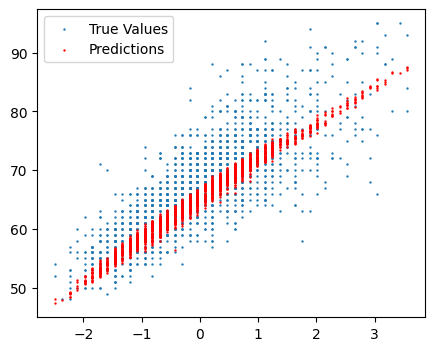

In [119]:
x = valid_x[:, 0]
y_true = valid_y
y_pred = y_pred

plt.scatter(x, y_true, label = "True Values", s = 0.5)
plt.scatter(x, y_pred, color = "red", label = "Predictions", s = 0.5)
plt.legend()
plt.show();

In [120]:
# params extraction
weights_lr = model.coef_
biases_lr = model.intercept_

weights_lr, biases_lr

(array([[ 5.91306141,  1.23953724, -0.38903148]]), array([65.28807107]))

In [131]:
print(f"Weight: {lr_model.coef_}")
print(f"Bias : {lr_model.intercept_}")

Weight: [[ 5.91306141  1.23953724 -0.38903148]]
Bias : [65.28807107]


Now we need to calculate the loss:

* Here the loss is Mean Squared Error (MSE):
$$MSE = \frac{1}n\sum_{i=1}^n(y_i - \hat{y}_i)^2$$

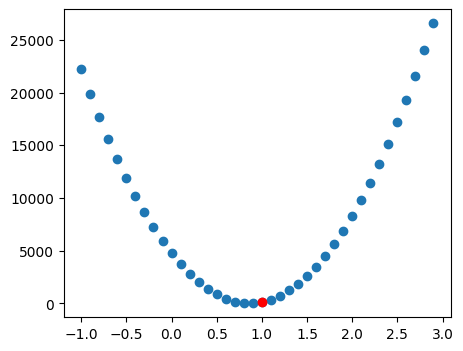

In [132]:
# calculate and plot diffrent losses for diffrent weight values
loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2
y = 81
ws = np.arange(-1, 3, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")
plt.show();

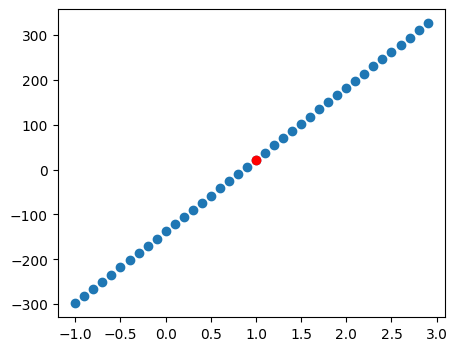

In [133]:
# calculate the gradient at a certain point
gradient = lambda w, y: ((w * 80 + 11.99) - y) * 2
gradients = gradient(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), "ro")
plt.show();

We can now see that the weights is directly proportional to loss

* if we increase the weight a little bit the loss changes a lot.
* to optimize the loss $L$ we need to take the partial derivative
 w.r.t both $w$ and $b$.
* $$RSS\;(L) = \sum_{i=1}^n\;(y - (wx_i + b))^2$$
&nbsp;
* $$\frac{\partial L}{\partial w} = -2\sum_{i=1}^n\;x_i(y-(wx_i + b))$$
&nbsp;
* $$\frac{\partial L}{\partial b} = -2\sum_{i=1}^n\;(y - (wx_i + b))$$

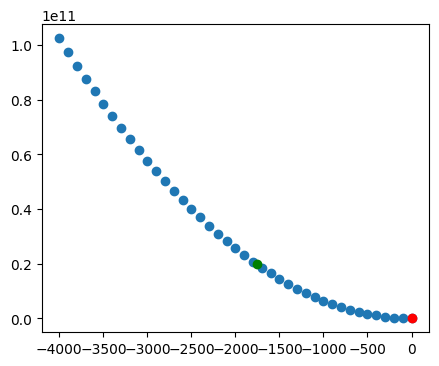

In [134]:
ws = np.arange(-4000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")
new_weight = 1 - gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), "go")
plt.show();

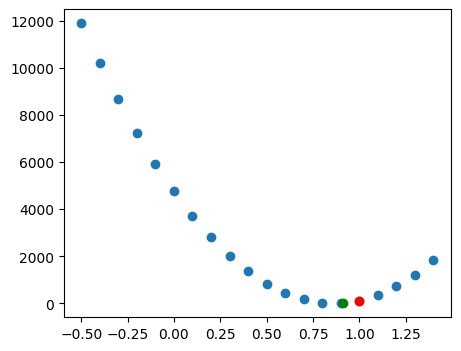

In [135]:
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws, y)

lr = 5e-5
plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")
new_weight = 1 - lr * gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), "go")
plt.show();

In [136]:
new_weight

0.91208

## **Implementing Linear Regression :**

In [137]:
int(.7 * len(data)), int(.85 * len(data)), len(data)

(9456, 11482, 13509)

training indexes : 0-9456

validation indexes : 9457-11482


testing indexes : 11483-13509

In [138]:
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

np.random.seed(0)
split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[TARGET].to_numpy()] for d in split_data ]

In [139]:
# define a function which will initialize weights and biases

def init_params(predictors):
  np.random.seed(0)
  weights = np.random.rand(predictors, 1)
  biases = np.ones((1, 1))
  return [weights, biases]

In [140]:
init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [141]:
# define a forward pass for linear regression

def forward(params, x):
  weights, biases = params
  prediction = x @ weights + biases
  return prediction

In [142]:
# define loss function and gradient functions

def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

def mse_gradient(y_true, y_pred):
  return y_pred - y_true

In [143]:
# implement backward pass for gradient descent

def backward(params, x, lr, grad):
  N = x.shape[0]
  # x1 * g, x2 * g, x3 * g
  w_grad = (x.T / N) @ grad
  b_grad = np.mean(grad, axis = 0)

  params[0] -= lr * w_grad
  params[1] -= lr * b_grad

  return params

In [144]:
# implement a training loop

lr = 1e-4
epoch = 100
params = init_params(train_x.shape[1])

for i in range(epoch):
  predictions = forward(params, train_x)
  grad = mse_gradient(train_y, predictions)

  params = backward(params, train_x, lr, grad)

  if (i%10 == 0):
    valid_pred = forward(params, valid_x)
    valid_loss = mse(valid_y, valid_pred)
    train_loss = mse(train_y, predictions)

    print(f"for epoch {i} train loss : {train_loss:.4f}, validation loss : {valid_loss:.4f}")

for epoch 0 train loss : 88.6116, validation loss : 31.5640
for epoch 10 train loss : 28.4802, validation loss : 30.6620
for epoch 20 train loss : 28.2736, validation loss : 30.3802
for epoch 30 train loss : 28.0750, validation loss : 30.1089
for epoch 40 train loss : 27.8842, validation loss : 29.8475
for epoch 50 train loss : 27.7009, validation loss : 29.5957
for epoch 60 train loss : 27.5247, validation loss : 29.3532
for epoch 70 train loss : 27.3554, validation loss : 29.1195
for epoch 80 train loss : 27.1926, validation loss : 28.8944
for epoch 90 train loss : 27.0363, validation loss : 28.6776


| Variable              | Shape                  | Reason                             |
| --------------------- | ---------------------- | ---------------------------------- |
| `x`                   | `(N, D)`                 | N samples, D features              |
| `weights`             | `(D, 1)`                 | one weight per feature             |
| `grad`                | `(N, 1)`                 | loss gradient w\.r.t. prediction   |
| `x.T @ grad`          | `(D, 1)`                 | gives gradient w\.r.t. each weight |
| `b_grad = mean(grad)` | `scalar (or shape (1,)`) | average error = bias gradient      |


In [145]:
def gradient_descent(train_x, train_y, valid_x, valid_y, predictors, epochs=100):

  def init_params(predictors):
    np.random.seed(0)
    weights = np.random.rand(predictors, 1)
    biases = np.ones((1, 1))
    return [weights, biases]

  def forward(params, x):
    weights, biases = params
    prediction = x @ weights + biases
    return prediction

  def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

  def mse_gradient(y_true, y_pred):
    return y_pred - y_true

  def backward(params, x, lr, grad):
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis = 0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

  lr = 1e-4
  params = init_params(train_x.shape[1])

  for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_gradient(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    if (i%10000 == 0):
      validation_prediction = forward(params, valid_x)
      valid_loss = mse(valid_y, validation_prediction)
      train_loss = mse(train_y, predictions)

      print(f"for epoch {i} train loss : {train_loss:.4f}, validation loss : {valid_loss:.4f}")

  return params

In [146]:
weights, biases = gradient_descent(train_x, train_y,
                                   valid_x, valid_y, predictors = 3,
                                   epochs = 100000)

for epoch 0 train loss : 88.6116, validation loss : 31.5640
for epoch 10000 train loss : 23.1573, validation loss : 22.6109
for epoch 20000 train loss : 23.1308, validation loss : 22.5770
for epoch 30000 train loss : 23.1051, validation loss : 22.5439
for epoch 40000 train loss : 23.0801, validation loss : 22.5117
for epoch 50000 train loss : 23.0558, validation loss : 22.4803
for epoch 60000 train loss : 23.0322, validation loss : 22.4496
for epoch 70000 train loss : 23.0091, validation loss : 22.4198
for epoch 80000 train loss : 22.9867, validation loss : 22.3907
for epoch 90000 train loss : 22.9650, validation loss : 22.3622


In [147]:
weights, biases

(array([[0.78592064],
        [0.2360652 ],
        [0.12406522]]),
 array([[1.9860877]]))

In [148]:
weights_lr, biases_lr

(array([[ 5.91306141,  1.23953724, -0.38903148]]), array([65.28807107]))

Since the parameters doesen't quite align with non-scaled input let's normalize the features and the try again with a little tweaking in the `gradient_descent()`

In [150]:
# scale the features before training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)

In [151]:
# implement more complex gradient descent with correct formulaes

def gradient_descent(train_x, train_y, valid_x, valid_y, epochs=10000):

  # initialize the weights and biases
  def init_params(predictors):
    np.random.seed(42)
    weights = np.random.rand(predictors, 1)
    biases = np.ones((1, 1))
    return [weights, biases]

  predictors = train_x.shape[1]
  params = init_params(predictors)

  # make a prediction
  def forward(params, x):
    weights, biases = params
    prediction = x @ weights + biases
    return prediction

  # calculates loss
  def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

  # calculated gradient
  def mse_gradient(y_true, y_pred):
    return (2 / y_true.shape[0]) * (y_pred - y_true)

  lr = 1e-1

  # update the weights and biases
  def backward(params, x, lr, grad):
    w, b = params
    w_grad = x.T @ grad
    b_grad = np.mean(grad)

    w -= w_grad * lr
    b -= b_grad * lr

    return [w, b]

  # training loop to update the params
  for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_gradient(train_y, predictions)

    w, b = backward(params, train_x, lr, grad)

    if (i%10000 == 0 or i == 199999):
      valid_predictions = forward(params, valid_x)
      valid_loss = mse(valid_y, valid_predictions)
      train_loss = mse(train_y, predictions)

      losses = [train_loss, valid_loss]

      print(f"for epoch {i} |   training loss : {train_loss:.4f} |   validation loss : {valid_loss:.4f}")


  return w, b, losses

In [152]:
weights, biases , loss = gradient_descent(train_x, train_y, valid_x, valid_y, epochs=200000)

for epoch 0 |   training loss : 4191.9485 |   validation loss : 4433.6212
for epoch 10000 |   training loss : 2729.5096 |   validation loss : 2944.2527
for epoch 20000 |   training loss : 1795.6519 |   validation loss : 1970.0397
for epoch 30000 |   training loss : 1183.9117 |   validation loss : 1325.6313
for epoch 40000 |   training loss : 783.1803 |   validation loss : 898.4555
for epoch 50000 |   training loss : 520.6740 |   validation loss : 614.5435
for epoch 60000 |   training loss : 348.7145 |   validation loss : 425.2573
for epoch 70000 |   training loss : 236.0694 |   validation loss : 298.5875
for epoch 80000 |   training loss : 162.2792 |   validation loss : 213.4454
for epoch 90000 |   training loss : 113.9415 |   validation loss : 155.9196
for epoch 100000 |   training loss : 82.2771 |   validation loss : 116.8183
for epoch 110000 |   training loss : 61.5348 |   validation loss : 90.0566
for epoch 120000 |   training loss : 47.9471 |   validation loss : 71.5970
for epoch 

In [153]:
weights, biases

(array([[ 5.91306141],
        [ 1.23953724],
        [-0.38903148]]),
 array([[64.3526786]]))

In [154]:
weights_lr, biases_lr

(array([[ 5.91306141,  1.23953724, -0.38903148]]), array([65.28807107]))

In [155]:
loss

[np.float64(23.01755044660499), np.float64(29.79096828346995)]



### 🔍 Parameter Comparison: Gradient Descent vs scikit-learn (on Scaled Features)

| Parameter     | Gradient Descent (Final) | scikit-learn (Scaled) | Match |
|---------------|---------------------------|------------------------|-------|
| Weight 1      | 5.91306141                | 5.91306141             | ✅     |
| Weight 2      | 1.23953724                | 1.23953724             | ✅     |
| Weight 3      | -0.38903148               | -0.38903148            | ✅     |
| Bias          | 64.3526786                | 65.28807107            | ⚠️ Close |

> ✅ The weights match exactly, confirming that the gradient descent implementation is correct.  
> ⚠️ The bias differs slightly due to rounding and the iterative nature of gradient descent (vs the exact solution of sklearn).
